# Dependencies

In [78]:
# import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# import variables from cleaner file
import main_preprocessing
X_train_scaled = main_preprocessing.X_train_secondary_droppedna
X_test_scaled = main_preprocessing.X_test_secondary_droppedna
y_train = main_preprocessing.y_train_secondary_droppedna
y_test = main_preprocessing.y_test_secondary_droppedna
global_random_state = main_preprocessing.global_random_state

# Modeling

### General Model

In [67]:
def fit_score(model, label):
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    y_pred = model.predict(X_test_scaled)
    print(f'-----{label}-----')
    print(classification_report(y_test, y_pred))
    return score

### Random Forest

In [68]:
# random forest function
def rfc():
    clf = RandomForestClassifier(n_estimators=50, random_state=global_random_state)
    return fit_score(clf, 'RANDOM FOREST')

### Extremely Random Forest

In [69]:
# extremely random forest function
def erf():
    clf = ExtraTreesClassifier(n_estimators=50, random_state=global_random_state)
    return fit_score(clf, 'EXTREMELY RANDOM FOREST')

### Logistic Regression

In [70]:
# logistic regression function for modularization
def lr():
    log = LogisticRegression()
    return fit_score(log, 'LOGISTIC REGRESSION')

### Support Vector Machine (SVM)

In [71]:
# svm function for modularization
def svm():
    svm = SVC(kernel='linear')
    return fit_score(svm, 'SUPPORT VECTOR MACHINE')

### K-Nearest Neighhor

In [72]:
# first determine the best number of k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.999/0.515
k: 3, Train/Test Score: 0.744/0.519
k: 5, Train/Test Score: 0.681/0.510
k: 7, Train/Test Score: 0.649/0.494
k: 9, Train/Test Score: 0.632/0.496
k: 11, Train/Test Score: 0.614/0.486
k: 13, Train/Test Score: 0.605/0.491
k: 15, Train/Test Score: 0.596/0.486
k: 17, Train/Test Score: 0.596/0.488
k: 19, Train/Test Score: 0.593/0.492


Text(0, 0.5, 'Testing accuracy Score')

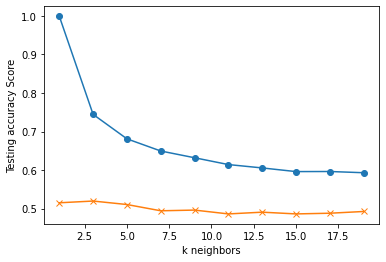

In [73]:
# graph the results
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")

In [74]:
# logistic regression function for modularization
def knn_final():
    knn = KNeighborsClassifier(n_neighbors=1)
    return fit_score(knn, 'KNEAREST NEIGHBORS')

### Total Comparison

In [75]:
# defining mega function to compare all supervised learning models
def model_tester():
  rfc()
  erf()
  lr()
  svm()
  knn_final()
  return

In [76]:
# running all supervised learning models
model_tester()

-----RANDOM FOREST-----
              precision    recall  f1-score   support

           0       0.67      0.52      0.58       725
           1       0.36      0.51      0.42       382

    accuracy                           0.51      1107
   macro avg       0.51      0.51      0.50      1107
weighted avg       0.56      0.51      0.53      1107

-----EXTREMELY RANDOM FOREST-----
              precision    recall  f1-score   support

           0       0.67      0.52      0.58       725
           1       0.36      0.51      0.42       382

    accuracy                           0.52      1107
   macro avg       0.51      0.51      0.50      1107
weighted avg       0.56      0.52      0.53      1107

-----LOGISTIC REGRESSION-----
              precision    recall  f1-score   support

           0       0.67      0.46      0.54       725
           1       0.36      0.57      0.44       382

    accuracy                           0.50      1107
   macro avg       0.51      0.51      0